In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import pymysql
import os, glob
import csv

In [3]:
folder_name = 'C:/Users/Monikos-PC/Desktop/SGT_Python/Practical/GITintro/Final_project/Data'

# detecting all .csv files
csv_files = glob.glob(os.path.join(f'{folder_name}/*.csv'))

In [4]:
full_df = pd.DataFrame()

for csv in csv_files:

    city_name = csv.split(folder_name)[1].split('_')[0][1:]
    day_type = csv.split(folder_name)[1].split('_')[1].split('.csv')[0]

    df = pd.read_csv(csv)
    df['city'] = city_name
    df['day_type'] = day_type

    full_df = pd.concat([full_df, df]).reset_index(drop=True)

In [5]:
full_df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day_type
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends
51703,1795,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends
51704,1796,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends
51705,1797,301.054157,Private room,False,True,2.0,False,0,0,10.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends


In [6]:
full_df.to_csv("Airbnb_full.csv",index=False,encoding="utf8",sep=";")
full_df.to_excel("Airbnb_full.xlsx",index=False)

In [7]:
import mysql.connector

# Establishing a connection to the database
cnx = mysql.connector.connect(user='root',
                              password='',
                              host='localhost',
                              database='airbnb prices')

# Creating a cursor object
cursor = cnx.cursor()

In [8]:
from sqlalchemy import create_engine
engine = create_engine("mysql+pymysql://root:@localhost/airbnb prices")

full_df.to_sql(name="Airbnb_full",con=engine,if_exists="append",index=False)

OperationalError: (pymysql.err.OperationalError) (1054, "Unknown column 'Unnamed: 0' in 'field list'")
[SQL: INSERT INTO `Airbnb_full` (`Unnamed: 0`, `realSum`, room_type, room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat, city, day_type) VALUES (%(UnnamedC_0)s, %(realSum)s, %(room_type)s, %(room_shared)s, %(room_private)s, %(person_capacity)s, %(host_is_superhost)s, %(multi)s, %(biz)s, %(cleanliness_rating)s, %(guest_satisfaction_overall)s, %(bedrooms)s, %(dist)s, %(metro_dist)s, %(attr_index)s, %(attr_index_norm)s, %(rest_index)s, %(rest_index_norm)s, %(lng)s, %(lat)s, %(city)s, %(day_type)s)]
[parameters: [{'UnnamedC_0': 0, 'realSum': 194.03369812293488, 'room_type': 'Private room', 'room_shared': 0, 'room_private': 1, 'person_capacity': 2.0, 'host_is_superhost': 0, 'multi': 1, 'biz': 0, 'cleanliness_rating': 10.0, 'guest_satisfaction_overall': 93.0, 'bedrooms': 1, 'dist': 5.022963798088291, 'metro_dist': 2.539380002594493, 'attr_index': 78.69037927190317, 'attr_index_norm': 4.166707868490748, 'rest_index': 98.25389587009934, 'rest_index_norm': 6.846472824200016, 'lng': 4.90569, 'lat': 52.41772, 'city': 'amsterdam', 'day_type': 'weekdays'}, {'UnnamedC_0': 1, 'realSum': 344.2457760176224, 'room_type': 'Private room', 'room_shared': 0, 'room_private': 1, 'person_capacity': 4.0, 'host_is_superhost': 0, 'multi': 0, 'biz': 0, 'cleanliness_rating': 8.0, 'guest_satisfaction_overall': 85.0, 'bedrooms': 1, 'dist': 0.4883892888289836, 'metro_dist': 0.2394039228349863, 'attr_index': 631.1763782503964, 'attr_index_norm': 33.421208615275404, 'rest_index': 837.2807567422693, 'rest_index_norm': 58.34292774344904, 'lng': 4.90005, 'lat': 52.37432, 'city': 'amsterdam', 'day_type': 'weekdays'}, {'UnnamedC_0': 2, 'realSum': 264.1014224451058, 'room_type': 'Private room', 'room_shared': 0, 'room_private': 1, 'person_capacity': 2.0, 'host_is_superhost': 0, 'multi': 0, 'biz': 1, 'cleanliness_rating': 9.0, 'guest_satisfaction_overall': 87.0, 'bedrooms': 1, 'dist': 5.748311915159562, 'metro_dist': 3.651621288793656, 'attr_index': 75.27587691428164, 'attr_index_norm': 3.9859076998790086, 'rest_index': 95.3869549262145, 'rest_index_norm': 6.646700254501156, 'lng': 4.97512, 'lat': 52.36103, 'city': 'amsterdam', 'day_type': 'weekdays'}, {'UnnamedC_0': 3, 'realSum': 433.5293979799874, 'room_type': 'Private room', 'room_shared': 0, 'room_private': 1, 'person_capacity': 4.0, 'host_is_superhost': 0, 'multi': 0, 'biz': 1, 'cleanliness_rating': 9.0, 'guest_satisfaction_overall': 90.0, 'bedrooms': 2, 'dist': 0.384862012821602, 'metro_dist': 0.4398760761319157, 'attr_index': 493.27253443070873, 'attr_index_norm': 26.11910845442667, 'rest_index': 875.0330975776227, 'rest_index_norm': 60.97356516795285, 'lng': 4.89417, 'lat': 52.37663, 'city': 'amsterdam', 'day_type': 'weekdays'}, {'UnnamedC_0': 4, 'realSum': 485.5529257375859, 'room_type': 'Private room', 'room_shared': 0, 'room_private': 1, 'person_capacity': 2.0, 'host_is_superhost': 1, 'multi': 0, 'biz': 0, 'cleanliness_rating': 10.0, 'guest_satisfaction_overall': 98.0, 'bedrooms': 1, 'dist': 0.5447381834292384, 'metro_dist': 0.3186926468416831, 'attr_index': 552.8303243593364, 'attr_index_norm': 29.272733004488263, 'rest_index': 815.3057399687838, 'rest_index_norm': 56.81167695874816, 'lng': 4.90051, 'lat': 52.37508, 'city': 'amsterdam', 'day_type': 'weekdays'}, {'UnnamedC_0': 5, 'realSum': 552.808567478265, 'room_type': 'Private room', 'room_shared': 0, 'room_private': 1, 'person_capacity': 3.0, 'host_is_superhost': 0, 'multi': 0, 'biz': 0, 'cleanliness_rating': 8.0, 'guest_satisfaction_overall': 100.0, 'bedrooms': 2, 'dist': 2.13142008057136, 'metro_dist': 1.904668241410844, 'attr_index': 174.7889567505081, 'attr_index_norm': 9.255191398952537, 'rest_index': 225.20166237399388, 'rest_index_norm': 15.69237583664536, 'lng': 4.87699, 'lat': 52.38966, 'city': 'amsterdam', 'day_type': 'weekdays'}, {'UnnamedC_0': 6, 'realSum': 215.12431748412348, 'room_type': 'Private room', 'room_shared': 0, 'room_private': 1, 'person_capacity': 2.0, 'host_is_superhost': 0, 'multi': 0, 'biz': 0, 'cleanliness_rating': 10.0, 'guest_satisfaction_overall': 94.0, 'bedrooms': 1, 'dist': 1.8810915643710744, 'metro_dist': 0.7297467390303181, 'attr_index': 200.1676516320246, 'attr_index_norm': 10.599010155873913, 'rest_index': 242.76552365826512, 'rest_index_norm': 16.91625096043449, 'lng': 4.9157, 'lat': 52.38296, 'city': 'amsterdam', 'day_type': 'weekdays'}, {'UnnamedC_0': 7, 'realSum': 2771.3073840601787, 'room_type': 'Entire home/apt', 'room_shared': 0, 'room_private': 0, 'person_capacity': 4.0, 'host_is_superhost': 1, 'multi': 0, 'biz': 0, 'cleanliness_rating': 10.0, 'guest_satisfaction_overall': 100.0, 'bedrooms': 3, 'dist': 1.6868069652027278, 'metro_dist': 1.4584035662283186, 'attr_index': 208.80810858545348, 'attr_index_norm': 11.056528092733858, 'rest_index': 272.31382294091856, 'rest_index_norm': 18.975218966216943, 'lng': 4.88467, 'lat': 52.38749, 'city': 'amsterdam', 'day_type': 'weekdays'}  ... displaying 10 of 51707 total bound parameter sets ...  {'UnnamedC_0': 1797, 'realSum': 301.0541570249866, 'room_type': 'Private room', 'room_shared': 0, 'room_private': 1, 'person_capacity': 2.0, 'host_is_superhost': 0, 'multi': 0, 'biz': 0, 'cleanliness_rating': 10.0, 'guest_satisfaction_overall': 87.0, 'bedrooms': 1, 'dist': 3.044099729768273, 'metro_dist': 0.2874346848517732, 'attr_index': 109.23657392762996, 'attr_index_norm': 7.82280265999432, 'rest_index': 158.56339833162306, 'rest_index_norm': 3.832416159831989, 'lng': 16.340999999999998, 'lat': 48.192, 'city': 'vienna', 'day_type': 'weekends'}, {'UnnamedC_0': 1798, 'realSum': 133.23048874552978, 'room_type': 'Private room', 'room_shared': 0, 'room_private': 1, 'person_capacity': 4.0, 'host_is_superhost': 1, 'multi': 1, 'biz': 0, 'cleanliness_rating': 10.0, 'guest_satisfaction_overall': 93.0, 'bedrooms': 1, 'dist': 1.2639317258506595, 'metro_dist': 0.4809025121922523, 'attr_index': 150.45038145298088, 'attr_index_norm': 10.774263618037606, 'rest_index': 225.2472928872708, 'rest_index_norm': 5.4441401628778365, 'lng': 16.39066, 'lat': 48.20811, 'city': 'vienna', 'day_type': 'weekends'}]]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
#cursor.execute("ALTER TABLE airbnb_full DROP ISTRINTI")

In [9]:
from sqlalchemy import text

engine = create_engine("mysql+pymysql://root:@localhost/airbnb prices")

with engine.begin() as con:
    query = text("SELECT * FROM airbnb_full")
    airbnb_df = pd.read_sql(query,con)
#     airbnb_df.to_csv("airbnb_full.csv",index=False,encoding="utf8",sep=";")
#     airbnb_df.to_excel("airbnb_full.xlsx",index=False)

In [10]:
import mysql.connector
from sqlalchemy import create_engine

# Establishing a connection to the database
cnx = mysql.connector.connect(user='root',
                              password='',
                              host='localhost',
                              database='airbnb prices')

# Creating a cursor object
cursor = cnx.cursor()

from sqlalchemy import text

engine = create_engine("mysql+pymysql://root:@localhost/airbnb prices")

with engine.begin() as con:
    query = text("SELECT * FROM airbnb_full")
    airbnb_db = pd.read_sql(query,con)

airbnb_db.isnull().sum()

ID                            0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi_rooms                   0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
center_dist                   0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
city                          0
day_type                      0
dtype: int64

In [11]:
airbnb_db.describe()

,ID,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi_rooms,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,center_dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,25854.000000,279.879630,0.007078,0.361518,3.161661,0.255903,0.291353,0.350204,9.390624,92.628232,1.15876,3.19127,0.681497,294.204116,13.423810,626.856688,22.786160
std,14926.669521,327.948372,0.083835,0.480445,1.298545,0.436372,0.454390,0.477038,0.954868,8.945531,0.62741,2.39382,0.857995,224.754095,9.807972,497.920239,17.804105
min,1.000000,34.780000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.02000,0.000000,15.150000,0.930000,19.580000,0.590000
25%,12927.500000,148.750000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.45000,0.250000,136.795000,6.380000,250.850000,8.750000
50%,25854.000000,211.340000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.61000,0.410000,234.330000,11.470000,522.050000,17.540000
75%,38780.500000,319.690000,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.26000,0.740000,385.755000,17.415000,832.630000,32.965000
max,51707.000000,18545.450000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.28000,14.270000,4513.560000,100.000000,6696.160000,100.000000


In [12]:
airbnb_db['city'] = airbnb_db['city'].str.capitalize()
airbnb_db.to_sql('airbnb_full', con=engine, if_exists='replace', index=False)
cnx.close()

In [ ]:
airbnb_db = airbnb_db.drop(columns = {'lng','lat'})
airbnb_db.to_sql('airbnb_full', con=engine, if_exists='replace', index=False)
cnx.close()

In [13]:
airbnb_db = airbnb_db.round(2)
airbnb_db.to_sql('airbnb_full', con=engine, if_exists='replace', index=False)
cnx.close()

In [14]:
airbnb_db = airbnb_db.rename(columns = {'dist':'center_dist'})
airbnb_db = airbnb_db.rename(columns = {'multi':'multi_rooms'})
airbnb_db.to_sql('airbnb_full', con=engine, if_exists='replace', index=False)
cnx.close()

In [15]:
average_price = airbnb_db.groupby(['city'], as_index=False)['realSum'].mean().round(2).rename(columns={'realSum':'Average'})
# average_price = average_price.sort_values('Average', ascending=False)
average_price

,city,Average
0,Amsterdam,573.11
1,Athens,151.74
2,Barcelona,293.75
3,Berlin,244.58
4,Budapest,176.51
5,Lisbon,238.21
6,London,362.47
7,Paris,392.53
8,Rome,205.39
9,Vienna,241.58


In [16]:
airbnb_counts=airbnb_db.groupby(['city'], as_index=False)['realSum'].count().reset_index().rename(columns={'realSum':'Count'})
# airbnb_counts=airbnb_counts.sort_values(by=['Count'],ascending=False)
airbnb_counts

,index,city,Count
0,0,Amsterdam,2080
1,1,Athens,5280
2,2,Barcelona,2833
3,3,Berlin,2484
4,4,Budapest,4022
5,5,Lisbon,5763
6,6,London,9993
7,7,Paris,6688
8,8,Rome,9027
9,9,Vienna,3537


In [17]:
satisfaction=airbnb_db.groupby(['city'], as_index=False)['guest_satisfaction_overall'].mean().reset_index().rename(columns={'guest_satisfaction_overall':'Satisfaction'})
satisfaction['Satisfaction']=satisfaction['Satisfaction'].round(2)

satisfaction

,index,city,Satisfaction
0,0,Amsterdam,94.51
1,1,Athens,95.00
2,2,Barcelona,91.11
3,3,Berlin,94.32
4,4,Budapest,94.59
5,5,Lisbon,91.09
6,6,London,90.65
7,7,Paris,92.04
8,8,Rome,93.12
9,9,Vienna,93.73


C:\Users\Monikos-PC\AppData\Local\Temp\ipykernel_7240\106695378.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  satisfaction_patch = mpatches.Patch(color='white', label='Guest Satisfaction', edgecolor='black')


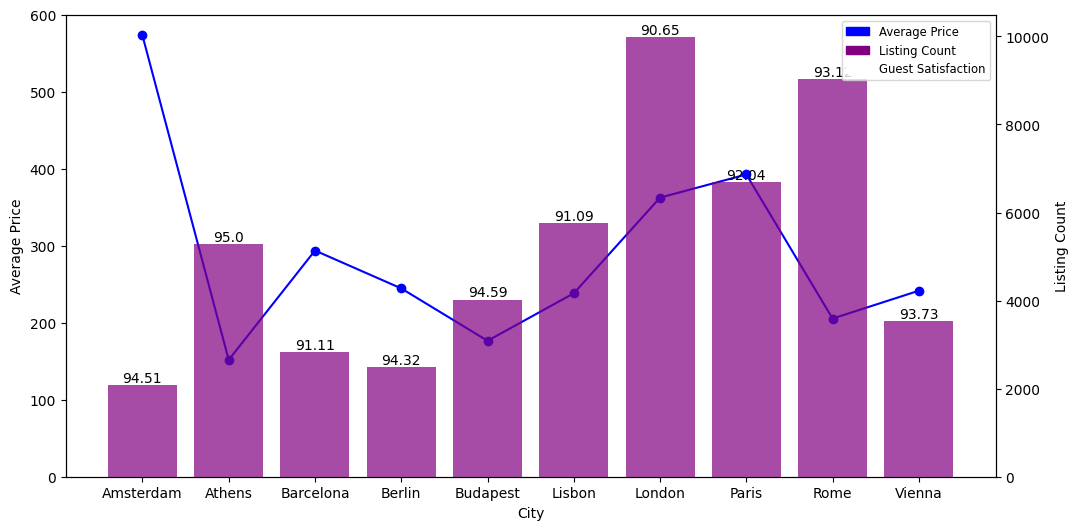

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Merge the airbnb_counts DataFrame with the satisfaction table
merged_data = pd.merge(airbnb_counts, satisfaction, on='city')

# Line plot
x = average_price['city']
y1 = average_price['Average']
ax1.plot(x, y1, color='blue', marker='o', label='Average Price')

# Bar plot
y2 = airbnb_counts['Count']
ax2.bar(x, y2, color='purple', alpha=0.7, label='Listing Count')

ax1.set_ylim([0, 600])

# Add satisfaction values on top of the count bars
for i, value in enumerate(merged_data['Satisfaction']):
    ax2.text(i, merged_data['Count'][i], str(value), ha='center', va='bottom')
 
# Set labels and title
ax1.set_xlabel('City')
ax1.set_ylabel('Average Price')
ax2.set_ylabel('Listing Count')

# Create custom legend handles and labels
legend_handles = []
legend_labels = []

# Add average price to legend handles and labels
average_price_patch = mpatches.Patch(color='blue', label='Average Price')
legend_handles.append(average_price_patch)
legend_labels.append('Average Price')

# Add count to legend handles and labels
count_patch = mpatches.Patch(color='purple', label='Listing Count')
legend_handles.append(count_patch)
legend_labels.append('Listing Count')

# Add satisfaction to legend handles and labels
satisfaction_patch = mpatches.Patch(color='white', label='Guest Satisfaction', edgecolor='black')
legend_handles.append(satisfaction_patch)
legend_labels.append('Guest Satisfaction')

# Create the legend
plt.legend(handles=legend_handles, labels=legend_labels, loc='upper right', fontsize='small')
    
# # Set labels and title
# ax1.set_xlabel('City')
# ax1.set_ylabel('Average Price')
# ax2.set_ylabel('Listing Count / Guest Satisfaction')

# # Set and combine the legends
# lines, labels = ax1.get_legend_handles_labels()
# bars, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + bars, labels + labels2, loc='upper right', fontsize='small', ncol=1)

# Show the plot
plt.show()


In [19]:
import mysql.connector
from sqlalchemy import create_engine
from sqlalchemy import text
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import pymysql
import os, glob
import csv

# Establishing a connection to the database
cnx = mysql.connector.connect(user='root',
                              password='',
                              host='localhost',
                              database='airbnb prices')

# Creating a cursor object
cursor = cnx.cursor()

engine = create_engine("mysql+pymysql://root:@localhost/airbnb prices")

with engine.begin() as con:
    query = text("SELECT * FROM airbnb_full")
    airbnb_db = pd.read_sql(query,con)


ranks = airbnb_db.groupby('city')['realSum'].mean().sort_values()[::-1].index
ranks

Index(['Amsterdam', 'Paris', 'London', 'Barcelona', 'Berlin', 'Vienna',
       'Lisbon', 'Rome', 'Budapest', 'Athens'],
      dtype='object', name='city')

NameError: name 'ax' is not defined

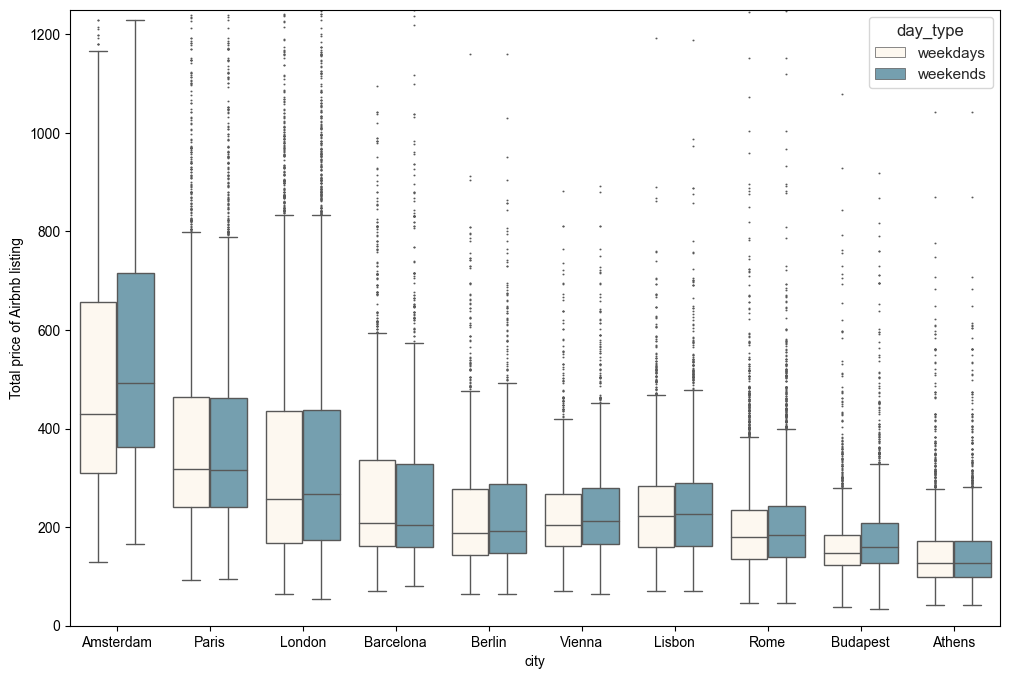

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 8))
plt.axis([0,8,0,1250])
sns.set_theme(style='ticks', palette='muted')
sns.boxplot(x="city", y="realSum", hue="day_type", palette=['#fff8ee', '#6ba3b9'], 
            data=airbnb_db, fliersize=0.5, linewidth=1, order=ranks)
plt.ylabel('Total price of Airbnb listing')
ax.set_xticklabels(ranks)
plt.grid(axis='y', linestyle='--', linewidth=.5)
plt.legend(loc=1)
plt.show()
plt.clf()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
room_type=airbnb_db.groupby(['city', 'room_type'])['realSum'].mean().unstack()
room_type.plot(kind='bar', ax=ax, width=0.6)

sns.set_theme(style='ticks', palette=['#cccccc', '#6ba3b9', '#ff99cc'])

# Set labels and title
ax.set_xlabel('City')
ax.set_ylabel('Price, Eur')
ax.set_title('Average Price by Room Type')
legend = ax.legend(title='', loc='upper right')
# Show the plot
plt.show()

In [51]:
import pandas as pd
import pymysql
import seaborn as sns

from sqlalchemy import create_engine
from sqlalchemy import text

# Establishing a connection to the database
cnx = mysql.connector.connect(user='root',
                              password='',
                              host='localhost',
                              database='airbnb prices')

# Creating a cursor object
cursor = cnx.cursor()

with engine.begin() as con:
    view1 = pd.DataFrame()
    query = text("SELECT realSum as price, center_dist, metro_dist  FROM airbnb_full")
    view1 = pd.read_sql(query,con)
    cnx.close()

In [52]:
#Removing outliers that impact the view:
q = view1["price"].quantile(0.999)
view11 = view1[view1["price"] < q]

#52 observations deleted

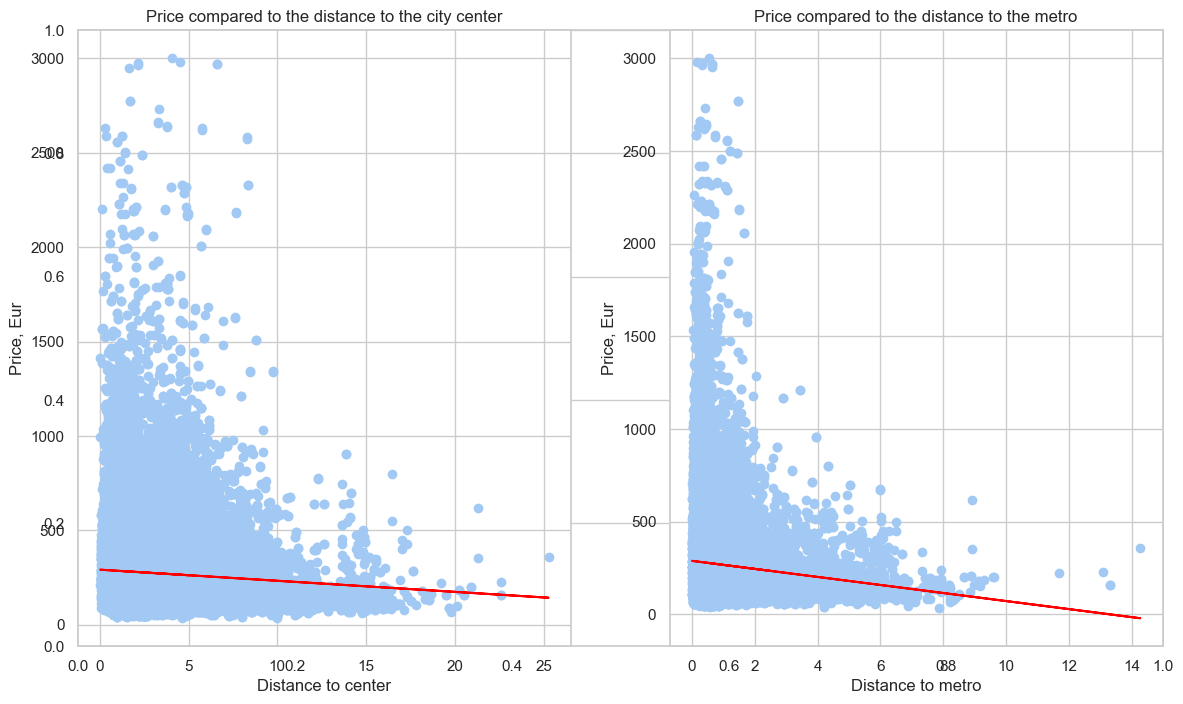

In [95]:
import statsmodels
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))
sns.set_theme(style='whitegrid', palette='pastel')

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x1= view11['center_dist']
x2 = view11['metro_dist']
y= view11['price']

a, b = np.polyfit(x1, y, 1)
ax1.scatter(x1, y)
ax1.plot(x1, a*x1+b, color = 'red')

a, b = np.polyfit(x2, y, 1)
ax2.scatter(x2, y)
ax2.plot(x2, a*x2+b, color = 'red')

# Set labels and title
ax1.set_xlabel('Distance to center')
ax1.set_ylabel('Price, Eur')
ax1.set_title('Price compared to the distance to the city center')

ax2.set_xlabel('Distance to metro')
ax2.set_ylabel('Price, Eur')
ax2.set_title('Price compared to the distance to the metro')

# Show the plot
plt.show()

In [96]:
import pandas as pd
import pymysql
import seaborn as sns

from sqlalchemy import create_engine
from sqlalchemy import text

# Establishing a connection to the database
cnx = mysql.connector.connect(user='root',
                              password='',
                              host='localhost',
                              database='airbnb prices')

# Creating a cursor object
cursor = cnx.cursor()

with engine.begin() as con:
    view2 = pd.DataFrame()
    query = text("SELECT" +
                 " realSum, person_capacity, cleanliness_rating, guest_satisfaction_overall " +
                 " bedrooms, center_dist, metro_dist " +
                 " attr_index, rest_index " +
                 " FROM airbnb_full ")
    view2 = pd.read_sql(query,con)
    cnx.close()

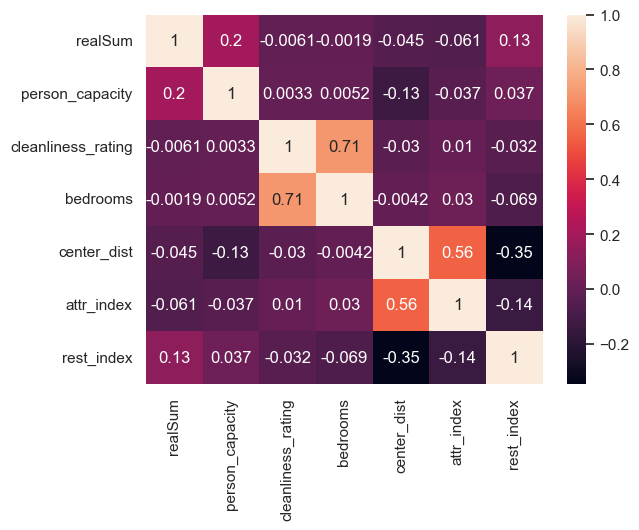

In [97]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(view2)

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [99]:
average_price.to_csv('average_price.csv', index=False)
airbnb_counts.to_csv('airbnb_counts.csv', index=False)

average_price.to_json('average_price.json', orient='records')
airbnb_counts.to_json('airbnb_counts.json', orient='records')

fig.savefig('plot.jpg', dpi=300)
#price_day.savefig('price_day.jpg', dpi=300)
#price_count.savefig('price_count.jpg', dpi=300)